# Chapter 4

# 4.4.6. Dimensionality reduction

Principal component analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic gene expression data
np.random.seed(42)
n_samples = 100
n_genes = 500
gene_expression = np.random.normal(size=(n_samples, n_genes))

# Create a DataFrame
df = pd.DataFrame(gene_expression, columns=[f'Gene_{i}' for i in range(n_genes)])

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


Singular value decomposition (SVD)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color

# Load and preprocess the image
original_image = color.rgb2gray(data.retina())
U, S, Vt = np.linalg.svd(original_image, full_matrices=False)

# Reconstruct the image with different numbers of singular values
singular_values = [5, 20, 50, 100]

fig, axes = plt.subplots(1, len(singular_values)+1, figsize=(15, 5))

# Original Image
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Compressed Images
for i, k in enumerate(singular_values):
    # Reconstruct image using k singular values
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    compressed_image = U_k @ S_k @ Vt_k
    
    axes[i+1].imshow(compressed_image, cmap='gray')
    axes[i+1].set_title(f'k = {k}')
    axes[i+1].axis('off')
plt.show()


t-Distributed Stochastic Neighbor Embedding (t-SNE)

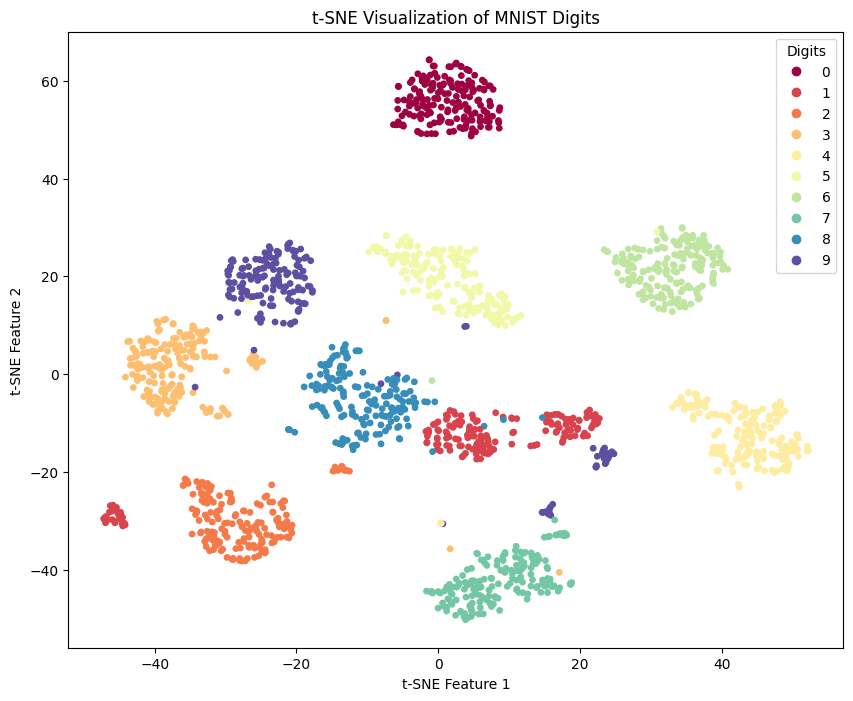

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load the MNIST digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='Spectral', s=15)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE Visualization of MNIST Digits')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

Uniform Manifold Approximation and Projection (UMAP)

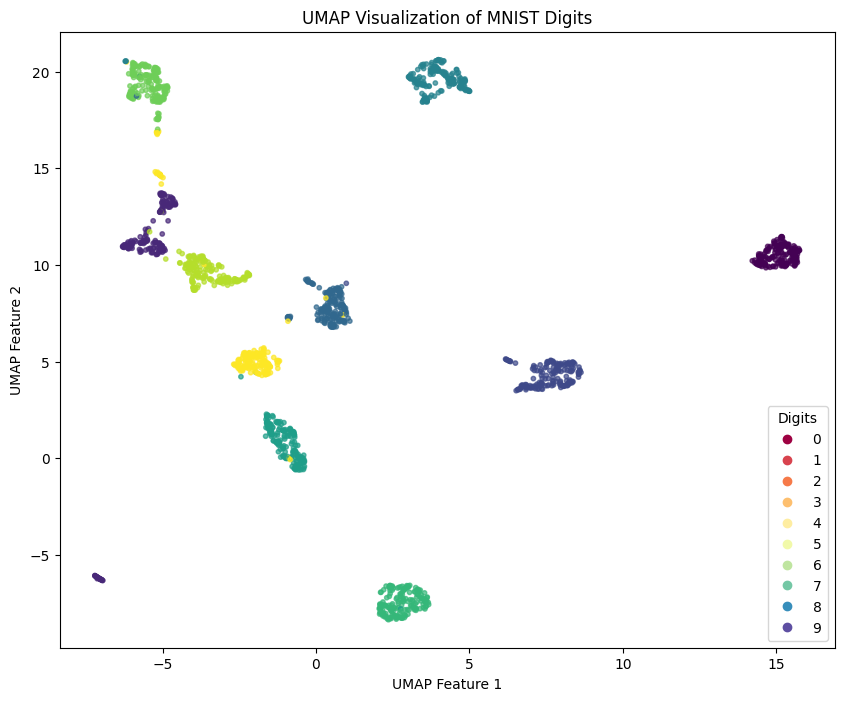

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import umap

# Load the MNIST digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, alpha=0.7, c=y)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('UMAP Visualization of MNIST Digits')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.show()